### <img src="https://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="40%" height="40%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 7359 Inteligencia Artificial I-2024 </h1>

<H3 align='center'> Tarea 3 - Aprendizaje Automático </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Árboles de decisión
* K-fold cross validation.
* Regresión Lineal.
* Lasso-Ridge.
* Regresión Logística
* Redes Neuronales
* KNN
* Ensamblados.


 

** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones.
* La tarea es individual, la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: 30 de junio 23:00. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad@ para presentar su tarea en la clase del 28 de agosto. 
* La Nota del informe se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{39}\right)+1$

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Prediciendo el área (en hectáreas) de un incendio forestal


En esta sección trabajaremos con un dataset conocido como Forest Fires, este se
encuentra en el repositorio de Datos de la Universidad de California Irvine https://archive.ics.uci.edu/dataset/162/forest+fires y contiene variables meteorológicas como temperatura, humedad relativa, lluvia y viento, además de otras variables como información espacial, temporal e índices de riesgo.  La variable
que nos interesará predecir a partir de los demás atributos será el número de hectáreas quemadas por el incendio.

<img src="https://images.theconversation.com/files/283500/original/file-20190710-44466-ajoxln.jpg?ixlib=rb-4.1.0&rect=0%2C234%2C3008%2C1504&q=45&auto=format&w=1356&h=668&fit=crop" title="Title text" width="60%"/>


## 1.1 Regresión Lineal Ordinaria

a) (1 pto) Construya un dataframe con los datos a analizar descargando los datos desde la pagina de <a href="https://www.kaggle.com/shivachandel/kc-house-data">Kaggle</a>  .
```python
import pandas as pd
import numpy as np

data = pd.read_csv("forestfires.csv", sep = ",", header = 0)     
```
¿Qué hace la última línea de código?

In [254]:
import pandas as pd
import numpy as np

data = pd.read_csv("forestfires.csv", sep = ",", header = 0)  

El *"pd.read_csv"* hace que pandas lea el archivo CSV, el *"forestfires.csv"* es el nombre del archivo CSV que se va a leer, *"sep"* es el limitador/separador para el archivo CSV y el *"header"* está indicando que la primera fila son los nombres de las columnas. 

b) (1 pto) Describa brevemente el dataset utilizar, comentando los resultados de cada uno de los siguientes comandos:
```python
data.shape
data.info()
data.describe()
```
Sus comentarios deben incluir el tipo de variables que se encuentran en el dataset.


In [256]:
data.shape

(517, 13)

El resultado es en forma de tupla qué indica el número de filas y de columnas (En formato ("X,Y")), en esté caso, 517 filas(número de instancias) y 13 columnas (número de variables)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Nos indica el nombre de cada columna, número de valores NO NULOS en cada columna, y el tipo de datos (int64, object y float64), esto nos sirve para identificar si es que el problema le hacen falta valores o si es que tienen datos erróneos.

In [261]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Esté comando nos expresa las estadísticas de cada columna (media, desviación estándar, valor mínimo, los percentiles y el valor máximo). También las estadísticas que nos entrega nos ayuda a comprender la distribución y su rango de valores de cada columna.
No

Este comando genera estadísticas descriptivas para cada columna numérica del DataFrame, como la media, la desviación estándar, el valor mínimo, los percentiles (25%, 50%, 75%) y el valor máximo. proporciona estadísticas resumidas útiles para entender la distribución y el rango de valores en las columnas numéricas del dataset. Nos ayuda a identificar valores atípicos (outliers), ver la dispersión de los datos y obtener una idea general de cómo están distribuidos los datos numéricos en el dataset.

Las *VARIABLES* utilizadas son de tipo "Númerico, Categórico y Dummy"

c) (1 pto) Necesitamos transformar las variables mes y día a tipo numérico. Una alternativa es usar una codificación cíclica para representar las variables, como si estuviesen en un reloj https://feature-engine.trainindata.com/en/latest/user_guide/creation/CyclicalFeatures.html.


```python
# replacing values
data['month'].replace(['jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec'],
                        [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
# replacing values
data['day'].replace(['mon', 'tue', 'wed', 'thu', 'fri','sat','sun'],
                        [1,2,3,4,5,6,7], inplace=True)
```

> ¿Cuál es la desventaja de esta representación?



In [275]:
# replacing values
data['month'].replace(['jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec'],
                        [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
# replacing values
data['day'].replace(['mon', 'tue', 'wed', 'thu', 'fri','sat','sun'],
                        [1,2,3,4,5,6,7], inplace=True)

d) (1 pto) Una alternativa es usar una codificación cíclica para representar las varialbes, como si estuviesen en un reloj https://feature-engine.trainindata.com/en/latest/user_guide/creation/CyclicalFeatures.html.


```python
data["month_sin"] = data_encoded_sin_cos['month'].apply(lambda x: np.sin(2 * np.pi * x / 12))
data["month_cos"] = data_encoded_sin_cos['month'].apply(lambda x: np.cos(2 * np.pi * x / 12))
data.drop(columns=['month'], inplace=True)
```

> Hága lo mismo con el atributo 'day'. 
> Explique y grafique qué hace esta codificación y cuál es la ventaja de usarla. 

e) (1 pto) Separe los datos en 70% entrenamiento, 20% validación y 10% de test.
```python
from sklearn.model_selection import train_test_split
y = data["area"]
x = data.drop("area", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=7)
```

f) (1 pto) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operación.
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
pd.DataFrame(x_train_sc, columns = x_train.columns)
y_train = np.array(y_train).reshape(-1,1)

scaler_y = StandardScaler()
y_train_sc = scaler_y.fit_transform(y_train)
```

g) (2 pts) Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia de definir fit_intercept=True.
```python
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=True)
linreg.fit(x_train_sc, y_train)
```

h) (1 pto) Muestre los coeficientes de la regresión lineal. Comente.
```python
linreg.intercept_
linreg.coef_
```

i) (1 pto) Obtenga el error en los conjuntos de entrenamiento y test (usando la escala original). Comente.
```python
pred_train_sc=linreg.predict(x_train_sc)
pred_train = scaler_y.inverse_transform(pred_train_sc)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred_train, y_train)
```

j) (2 pts) Estime el error de predicción del modelo usando validación cruzada con un número de "bloques" igual a
K = 5 y K = 10 sobre el conjunto de entrenamiento. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado "bloque". Compare con el error de test obtenido en h) y concluya.

Solo un ejemplo inspirador...
```python
from sklearn.model_selection import train_test_split, KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=7)
mse_cv_scores = cross_val_score(linreg, x_train_sc, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mse_cv = -np.mean(mse_cv_scores)
print(f'Cross-validated MSE: {mse_cv}')
```


l) (2 pts) Ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma L2. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^4; 10^{-1}]$. Construya un gráfico que muestre los
coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (Hint:
Note que la línea 4 y el primer argumento en la línea 12 son críticos).
```python
# Generar valores de alpha
alphas = np.logspace(4, -1, num=50)

# Almacenar coeficientes
coefs = []

# Crear y ajustar el modelo Ridge para cada valor de alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(x_train_sc, y_train_sc)
    coefs.append(ridge.coef_)

# Convertir a array numpy para facilitar el trazado
coefs = np.array(coefs)

# Definir nombres de regresores
names_regressors = ["X", "Y", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "month_sin", "month_cos", "day_sin", "day_cos"]

# Crear el gráfico
fig, ax = plt.subplots()
for coef, label in zip(coefs.T, names_regressors):
    ax.plot(alphas, coef, label=label)

# Configurar el gráfico
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # Invertir el eje x
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.legend(loc='best')
plt.show()
```

m) (2 pts) Ajuste un modelo lineal utilizando el método "Lasso", es decir, regularizando con la norma L1. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^1; 10^{-2}]$, modificando el código anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
clf = Lasso(fit_intercept=True)
```

n) (2 pts) Utilizando "Ridge Regression", construya un gráfico que muestre el error de entrenamiento y el error
de validación como función del parámetro de regularización. Discuta lo que observa.
```python
# Generar valores de alpha
alphas_ = np.logspace(2, -2, base=10)
# Almacenar errores de entrenamiento y validación
mse_train = []
mse_val = []
# Crear y ajustar el modelo Ridge para cada valor de alpha
for alpha in alphas_:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(x_train_sc, y_train_sc)
    # Predicciones en conjunto de entrenamiento y validación
    yhat_train = ridge.predict(x_train_sc)
    yhat_val = ridge.predict(x_val_sc)
    # Calcular el MSE en conjunto de entrenamiento y validación
    mse_train.append(mean_squared_error(y_train_sc, yhat_train))
    mse_val.append(mean_squared_error(y_val_sc, yhat_val))

# Crear el gráfico
fig, ax = plt.subplots()
ax.plot(alphas_, mse_train, label='train error ridge')
ax.plot(alphas_, mse_val, label='validation error ridge')

# Configurar el gráfico
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # Invertir el eje x
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Regularization Path RIDGE')
plt.show()
```

o) (2 pts) Utilizando "Lasso", construya un gráfico que muestre el error de entrenamiento y el error de validación
como función del parámetro de regularización. Discuta lo que observa.

```python
1 alphas_ = np.logspace(0.5,-2,base=10)
```

p) (1 pto) Elija el mejor modelo para ridge regresión obtenido en n) y el mejor modelo para lasso obtenido en o), calcule el error desnormalizado en el conjundo de test y compare, comentando los resultados.

<a id="tercero"></a>
## 2. Calidad del vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas
personas que otras, esto depende de la gran cantidad de químicos y procesos que se aplican a la producción
de vino. Para el área de negocios el estimar cuál es la calidad del vino en base a la apreciación de la gente es
una tarea bastante difícil.
Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugués
”Vinho Verde” (https://archive.ics.uci.edu/ml/datasets/wine+quality ). Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link.
Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
la calidad quality, es un valor entero entre 0 y 10.

<img src="https://images.unsplash.com/photo-1506377247377-2a5b3b417ebb?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjExNzczfQ" title="Title text" width="40%"/>




a) (1 pto)  Cargue los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar.
```python
 import pandas as pd
 df_red = pd.read_csv("winequality-red.csv",sep=";")
 df_white = pd.read_csv("winequality-white.csv",sep=";")
 df = pd.concat([df_red,df_white], axis=0)
 #genere atributo ’tipo’
```

In [139]:
 import pandas as pd
 df_red = pd.read_csv("winequality-red.csv",sep=";")
 df_white = pd.read_csv("winequality-white.csv",sep=";")

In [141]:
 df_red['tipo']='tinto'

In [143]:
df_white['tipo']='blanco'

In [145]:
df = pd.concat([df_red,df_white], axis=0) #1 derecha , 0 abajo 

In [147]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanco
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanco
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanco
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanco


In [149]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


b) (1 pto) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de calidad o
no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta
etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos
conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
(25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

```python
1 df[’good_quality’] = [1 if q>5 else 0 for q in df.quality]
2 #train and test split over df
```

In [152]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]

In [154]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanco,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanco,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanco,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanco,1


In [156]:
df = pd.get_dummies(df, columns=['tipo'], prefix=['tipo'])

In [158]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality,tipo_blanco,tipo_tinto
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,False,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,False,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,False,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,False,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,True,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,True,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,True,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,True,False


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df['good_quality']
x = df.drop(["good_quality","quality"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=7)

In [162]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: good_quality, Length: 6497, dtype: int64

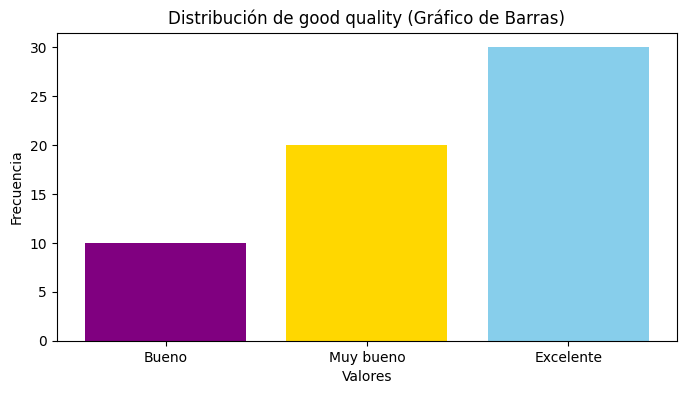

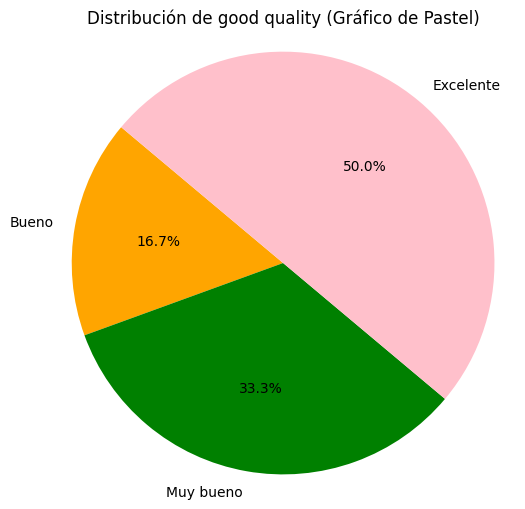

In [241]:
import matplotlib.pyplot as plt

# Define the etiquetas and conteo variables
etiquetas = ['Bueno', 'Muy bueno', 'Excelente']
conteo = [10, 20, 30]

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(etiquetas, conteo, color=['purple', 'gold', 'skyblue'])  # Colores personalizados para cada barra
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de good quality (Gráfico de Barras)')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'pink'])  # Colores personalizados para cada sector
plt.axis('equal')
plt.title('Distribución de good quality (Gráfico de Pastel)')
plt.show()


In [165]:
scaler = StandardScaler()
scaler.fit(x_train)#cabia escala
x_train =scaler.transform(x_train)#transforma escala
x_test=scaler.transform(x_test)

In [168]:
x_train

array([[-0.47529469, -1.02884169,  0.2073442 , ...,  0.68212189,
         0.57102988, -0.57102988],
       [-0.32155443,  0.84013935, -1.64042255, ..., -0.74518314,
        -1.75122185,  1.75122185],
       [-0.55216482,  1.0812982 , -1.0245003 , ..., -0.40934666,
         0.57102988, -0.57102988],
       ...,
       [ 0.67775723,  2.92013439, -0.54544966, ...,  0.17836717,
        -1.75122185,  1.75122185],
       [ 2.8301208 , -0.12449603,  1.37075289, ...,  0.85004013,
        -1.75122185,  1.75122185],
       [-0.16781418, -1.14942112, -0.13483483, ..., -0.82914226,
         0.57102988, -0.57102988]])

In [170]:
x_test

array([[ 2.52264029,  0.29753195,  0.96013805, ...,  0.76608101,
        -1.75122185,  1.75122185],
       [-1.39773622, -0.72739314,  0.2073442 , ...,  1.68963132,
         0.57102988, -0.57102988],
       [-0.62903494, -0.12449603, -0.61388547, ..., -1.16497873,
         0.57102988, -0.57102988],
       ...,
       [ 0.83149748, -0.48623429,  0.68639483, ..., -0.91310138,
        -1.75122185,  1.75122185],
       [ 2.67638054,  0.35782166,  1.09700967, ..., -0.66122402,
        -1.75122185,  1.75122185],
       [-0.62903494, -0.42594458,  1.16544547, ..., -1.08101961,
         0.57102988, -0.57102988]])

c) (4 pts) Entrene un clasificador SVM con los datos

Comente sobre el desempeño del modelo y su sensibilidad a los parámetros `C` y `gamma` (midiendo el error en la escala original del conjunto de validación)

```python
from sklearn.svm import SVC
SV = SVC(C=1, gamma=5)
```

In [173]:
from sklearn.svm import SVC
SV = SVC(C=1, gamma=5)

In [175]:
SV.fit(x_train, y_train)

SVC(C=1, gamma=5)

In [176]:
y_pred = SV.predict(x_test)

In [177]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Métrica F1:", f1)

Métrica F1: 0.8462157809983897


d) (4 pts) Entrene un solo Arbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los
hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html sobre
el conjunto de entrenamiento y de pruebas.

In [179]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [180]:
y_pred = clf.predict(x_test)

In [181]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print("Métrica F1:",f1)

Métrica F1: 0.8176100628930818


In [182]:
from sklearn.tree import DecisionTreeClassifier

# define el clasificador con los hiperparametros ajustados
clf1 = DecisionTreeClassifier(
    criterion='entropy',         # funcion para medir la calidad de una partición (puede cambiar entre  'gini' o 'entropy')
    max_depth=100,           # sirve para la Profundidad maxima del árbol (aqui  None significa sin límite)
    min_samples_split=2,      # numero minimo de muestras  para dividir un nodo interno
    min_samples_leaf=1,       # numero minimo de muestras en un nodo hoja
    max_features=None,        # numero de caracteristicas a considerar en cada split (aqui None significa todas)
    random_state=42         # semilla para repetibilidad de resultados
)
# entrenar el clasificador con los nuevos hiperparametros
clf1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=42)

In [184]:
y_pred = clf1.predict(x_test)

In [185]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print("Métrica F1:",f1)

Métrica F1: 0.833810888252149


In [186]:
from sklearn.tree import DecisionTreeClassifier


clf2 = DecisionTreeClassifier(
    criterion='gini',         # funcion para medir la calidad de una partición (puede cambiar entre  'gini' o 'entropy')
    max_depth=200,           # sirve para la Profundidad maxima del árbol (aqui  None significa sin límite)
    min_samples_split=3,       # numero minimo de muestras  para dividir un nodo interno
    min_samples_leaf=2,      # numero minimo de muestras en un nodo hoja
    max_features=None,       # numero de caracteristicas a considerar en cada split (aqui None significa todas)
    random_state=42         # semilla para repetibilidad de resultados
)
# entrenar el clasificador con los nuevos hiperparametros
clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=200, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [187]:
y_pred = clf2.predict(x_test)

In [192]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print("Métrica F1:",f1)

Métrica F1: 0.8094534711964549


e) (4 pts) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

```python
1 from sklearn.ensemble import RandomForestClassifier
2 model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
```

In [200]:
n_estimators_values = [100, 200, 300, 400, 500]
max_depth_values = [10, 50, 100, 150, 200]

In [202]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [212]:
f1_scores = np.zeros((len(n_estimators_values), len(max_depth_values))) # genera un arreglo utilizando 
                                                                        #el largo de arreglos anteriores pero con 1y0

for i, n_estimators in enumerate(n_estimators_values):#recorre los 2 arreglos previos
    for j, max_depth in enumerate(max_depth_values): 
       
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
        #introduce valores  como hiperparametros

        # entrena el modelo
        model.fit(x_train, y_train)

        # realiza predicciones en el conjunto de prueba
        y_pred = model.predict(x_test)

        # calcula el F1-score
        f1 = f1_score(y_test, y_pred)

        # almacena el F1-score en la matriz
        f1_scores[i, j] = f1

In [213]:
import matplotlib.pyplot as plt

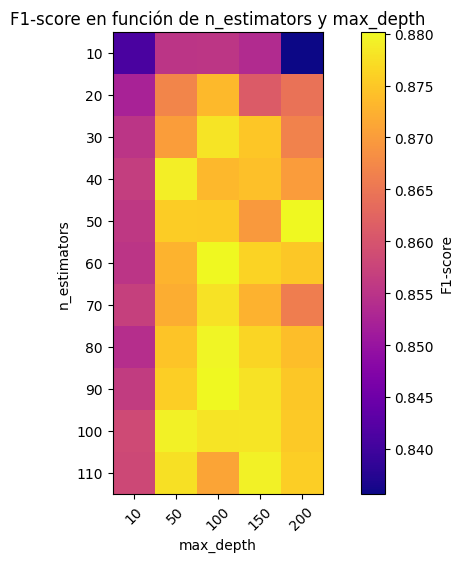

In [226]:
plt.figure(figsize=(10, 6))
plt.imshow(f1_scores, interpolation='nearest', cmap='plasma')
plt.title('F1-score en función de n_estimators y max_depth')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.xticks(np.arange(len(max_depth_values)), max_depth_values, rotation=45)
plt.yticks(np.arange(len(n_estimators_values)), n_estimators_values)
plt.colorbar(label='F1-score')
plt.show()

f) (4 pts) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con
la técnica utilizada en d).

```python
1 from sklearn.ensemble import AdaBoostClassifier
2 model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)
```

In [216]:
from sklearn.ensemble import AdaBoostClassifier

In [217]:
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110]
max_depth_value = 1 # Profundidad máxima del árbol base/ se puede variar el max_depth_value (riesgo de sobreajuste)
train_f1_scores = []
test_f1_scores = []

In [236]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Suponiendo que tienes definidos x_train, y_train, x_test, y_test, max_depth_value y n_estimators_values

train_f1_scores = []
test_f1_scores = []

for n_estimators in n_estimators_values:
    base_classifier = DecisionTreeClassifier(max_depth=max_depth_value)

    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators)

    adaboost_classifier.fit(x_train, y_train)

    train_predictions = adaboost_classifier.predict(x_train)
    test_predictions = adaboost_classifier.predict(x_test)

    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

C:\Users\themu\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\themu\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\themu\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\themu\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\the

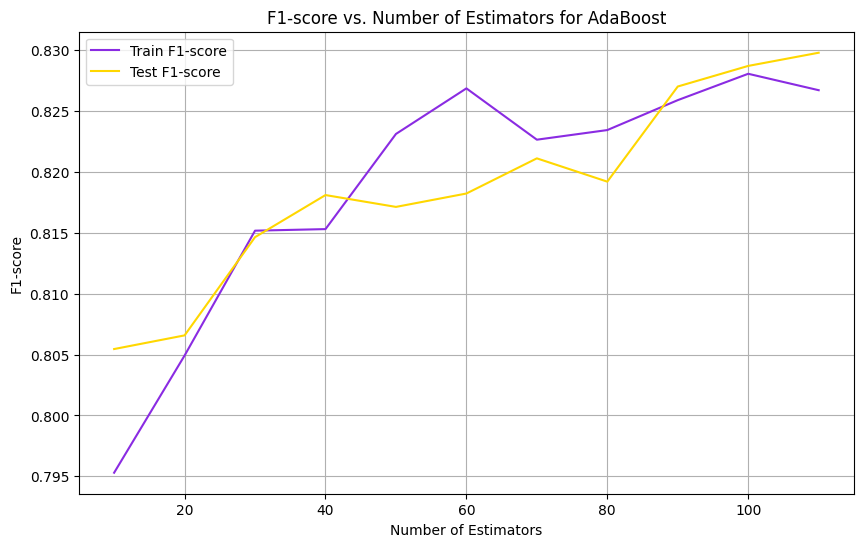

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_f1_scores, color='#8A2BE2', label='Train F1-score')  # Violeta
plt.plot(n_estimators_values, test_f1_scores, color='gold', label='Test F1-score')  # Amarillo
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Estimators for AdaBoost')
plt.legend()
plt.grid(True)
plt.show()

El árbol de clasificación puede ser más complejo y propenso a sobreajuste si no se controla adecuadamente su profundidad. Por otro lado, el ensamblador de árboles de AdaBoost utiliza árboles que son débiles que normalmente son más simples y menos propensos al sobreajuste individualmente.

Otra diferencia es que al combinar varios modelos que pueden ser paúperrimos, Adaboost generalmente tendrá una mejor capacidad de generalización si lo comparamos con UN solo árbol de decisión, más aún si es que aplicamos técnicas de regularización y un ajuste de hiperparámetros

Ya para terminar, quiero mencionar el Rendimiento para predecir de ambos, si es que se nos presentas problemas de mayor complejidad y varianza, el Adaboost puede ofrecer un mejor número de resultados si combinamos la fuerza de modelos débiles, mientras que UN solo árbol puede ser limitado debido a su estructura y "puede" que le sea falta adaptabilidad en la "varianza" de los datos